# SYRIATEL CUSTOMER CHURN

### Instructors
* Samuel Karu 
* Nikita Njoroge
* Anthony Muiko
* Lucille Kaleha

#### Repository Link

## Business Problem

##  Introduction

## 1. Project Overview



The years of civil war and destruction to infrastructure continue to have a toll on the telecoms sector in Syria. Although over the years the major mobile service providers Syriatel and MTN Syria have endeavoured to restore and rebuild damaged networks, the operating environment has been difficult. Following disputed demands for back taxes, MTN Group in August 2021 exited the country, after its majority stake had been transferred to judicial guardianship. This effectively meant that the mobile market became a monopoly, with Syriatel as the only operator. Nevertheless, in February 2022 the regulator awarded a third mobile licence, to Wafa Telecom, following a process which had been ongoing for many years.

Telecommunication services in Syria are highly regulated. Although urban areas can make use of the network built and maintained by the government-owned incumbent Syrian Telecommunications Establishment (STE), many underserved remote areas in the countryside are obliged to rely on satellite communications. The domestic and international fixed-line markets in Syria remain the monopoly of the STE, despite several initiatives over the years aimed at liberalising the market.

Mobile broadband penetration in Syria is still quite low, despite quite a high population coverage of 3G networks and some deployment of LTE infrastructure. This may provide potential opportunities for growth once infrastructure and economic reconstruction efforts make headway, and civil issues subside

### 1.1 Problem Statement

#### 1.2 Objective

#### Main Objective

The main objective is to come up with a predictive /accurate model that is an improvement of the baseline model to assist SyriaTel in reducing how much money is lost because of customers who don't stick around very long.

#### Specific Objective

* To determine if international plan  has influence in customer churn ? 
* To find whether customer total charge has supremacy on  customer churn
* To determine whether 

### 1.3 Experimental Design Taken.

Data:
The title of this dataset is called "Churn in Telecom's dataset" from kaggle.com

Number of records: 3333
Number of columns: 20
Target variable: churn
Models:

Baseline model: Logistic regression
Model 2: Decision tree
Model 3: Random forest

# Column Descriptions
---
- <code><b>state</b></code>, string. 2-letter code of the US state of customer residence
- <code><b>account_length</b></code>, numerical. Number of months the customer has been with the current telco provider
- <code><b>area_code</b></code>, string="area_code_AAA" where AAA = 3 digit area code.
- <code><b>international_plan</b></code>, (yes/no). The customer has international plan.
- <code><b>voice_mail_plan</b></code>, (yes/no). The customer has voice mail plan.
- <code><b>number_vmail_messages</b></code>, numerical. Number of voice-mail messages.
- <code><b>total_day_minutes</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_calls</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_charge</b></code>, numerical. Total charge of day calls.
- <code><b>total_eve_minutes</b></code>, numerical. Total minutes of evening calls.
- <code><b>total_eve_calls</b></code>, numerical. Total number of evening calls.
- <code><b>total_eve_charge</b></code>, numerical. Total charge of evening calls.
- <code><b>total_night_minutes</b></code>, numerical. Total minutes of night calls.
- <code><b>total_night_calls</b></code>, numerical. Total number of night calls.
- <code><b>total_night_charge</b></code>, numerical. Total charge of night calls.
- <code><b>total_intl_minutes</b></code>, numerical. Total minutes of international calls.
- <code><b>total intl calls</b></code>, numerical. Total number of international calls.
- <code><b>total intl charge</b></code>, numerical. Total charge of international calls
- <code><b>number customer service calls</b></code>, numerical. Number of calls to customer service
- <code><b>churn</b></code>, (yes/no). Customer churn - target variable.

## 2. Data Exploration & Data Preparation

In [189]:
#import modules and packages

#Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels as statsmd

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV # for splitting the dataset into test and train
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,FunctionTransformer # to scale the numeric features
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report # performance metrics
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler



# Algorithms for supervised learning methods.

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,precision_recall_fscore_support, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate, cross_val_predict, cross_val_score

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

# Business and Data undertstanding

#### Business Understanding



In [190]:
#import main data file and view the first 5 columns using the .head function.
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

*This segment is meant to  help us view and understand the data as well as get the domain knowlede needed for our analysis.*


In [191]:
# creating a function  to view our data
def describe_columns(self):
    print(self.columns)#listing the columns in our dataset
    print(self.shape) #Checking for the number of rows and columns in our DataFrame
    print(self.info())#summary of the DataFrame's structure,number of rows and columns, the columns data types , count of non-null values in each column
    print(self.describe()) # Describing the data with inferential statistics.

In [192]:
describe_columns(churn_data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333

`Insights`:
- The data has a total of 21 columns
- The data has  3333 rows and 21 columns
- The longest customer account length in SyriaTel is 243 the smallest is 1 majority of the customers have an account length of 101
- There are only 3 area codes
- The standard  deviation for total night charge ,total evening charge,total day charge are    2.28 , 4.31 , 9.26 respectively hence this shows a greater degree of variability or spread in the data
- The standard deviation for total international charge is 0.754 hence this indicates less variability and a more concentrated distribution around the mean
- "<b>international plan</b>", "<b>voice mail plan</b>" have yes/no values and will need to be changed to a 1 and 0. 
 
- The target variable "<b>churn</b>" has a boolean value, and needs to be changed to a 1 and 0.

### Data Preparation
#### EDA

The goal of  here is to uncover patterns, relationships, and key insights from the data, which can inform further analysis, modeling, and decision-making processes.

In [193]:

# Creating a function to view columns datatypes
def view_column_dtypes(churn_data):
 
    "This is a plain  function to help narrate the column data types"

    print('num_cols: \n', churn_data.select_dtypes(int).columns)
    print('======================================================')
    print('cat_cols: \n', churn_data.select_dtypes(object).columns)
    print('======================================================')
    print('boolean_cols: ', churn_data.select_dtypes(bool).columns)
    print('======================================================')
    print('float_cols: \n', churn_data.select_dtypes(float).columns)



In [194]:
view_column_dtypes(churn_data)

num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')


In [195]:
# checking for the uniqueness of our DataFrame
def no_unique(data):
    nunique = churn_data.nunique()
    return(nunique)
    plot_bar = plt.bar(churn_data['phone number'])
no_unique(churn_data)

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### Data Summary

A brief summary of the data type of each column and the number of unique values it contains

| Feature  	                |        Range/Unique Values Stat	|         Data Type    |
| :------------------------:| :--------------------------------: | :------------------: |
| State	                    |        Unique values 51	        |      Categorical     |
| Account length	        |        Range 1-243	            |      Integer         |
| Area code	                |        Unique values 3	        |      Categorical     |
| International plan	    |        Unique values 2	        |      Categorical     |
| Voice mail plan	        |        Unique values 2	        |      Categorical     |
| Number vmail messages  	|        Range 0-50	                |      Integer         |
| Total day minutes	        |        Range 0-351	            |      Float           |
| Total day calls	        |        Range 0-160	            |      Integer         |
| Total day charge	        |        Range 0-60	                |      Float           |
| Total eve minutes      	|        Range 0-364	            |      Float           |
| Total eve calls	        |        Range 0-170	            |      Integer         |
| Total eve charge	        |        Range 0-31	                |      Float           |
| Total night minutes	    |        Range 44-395	            |      Float           |
| Total night calls	        |        Range 33-166	            |      Integer         |
| Total night charge        |        Range 0-18	                |      Float           |
| Total intl minutes	    |        Range 0-20	                |      Float           |
| Total intl calls	        |        Range 0-20	                |      Integer         |
| Total intl charge	        |        Range 0-5	                |      Float           |
| Customer service calls	|	     Range 0-9	                |      Integer         |
| Churn	  	                |        Unique values 2	        |      Categorical     |

### Visualization

#### Univariate

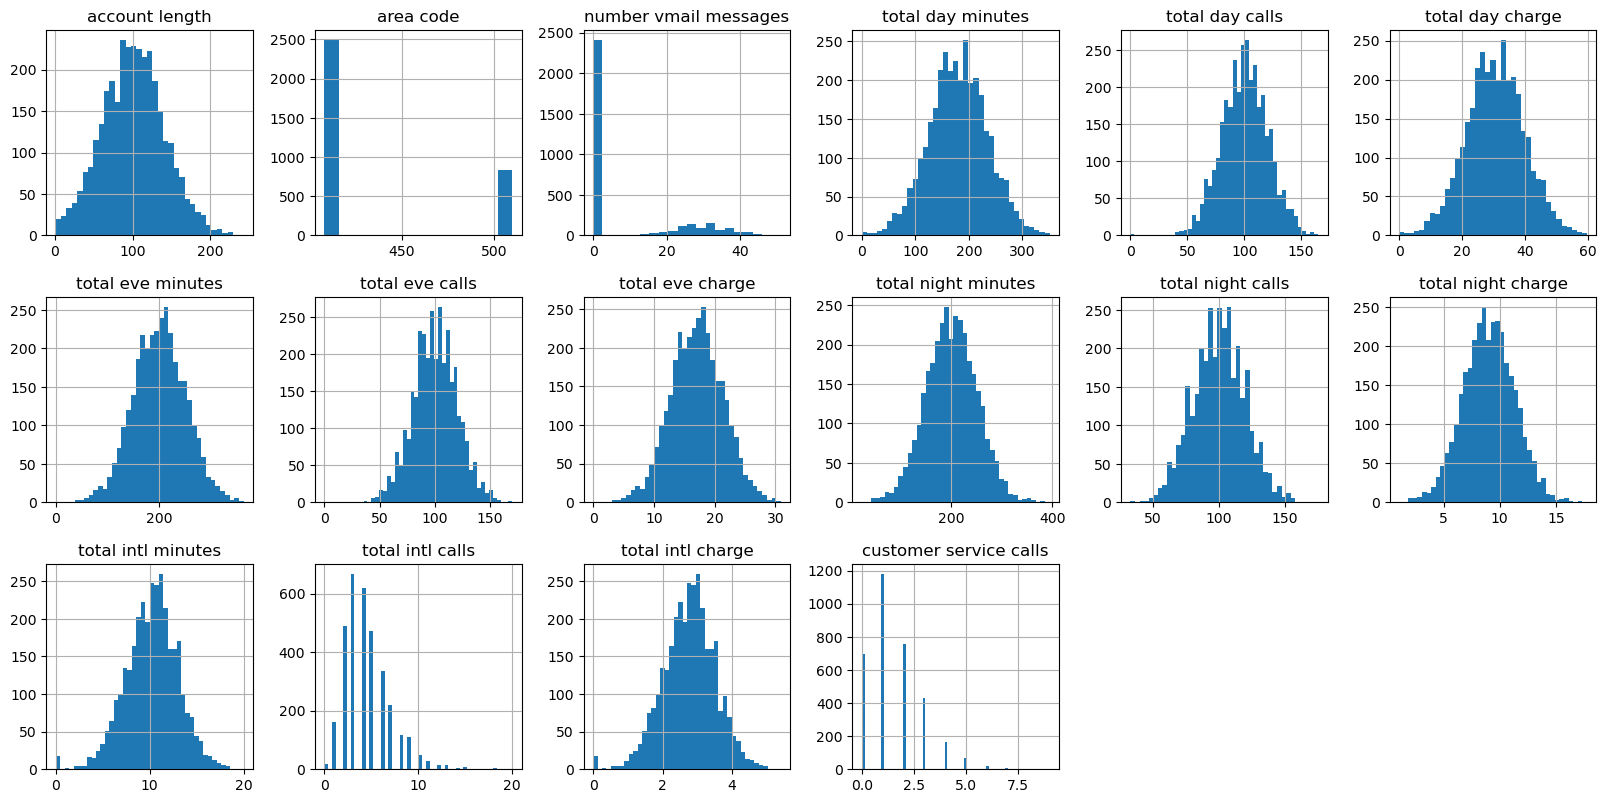

In [196]:
# Check the distribution of the data
churn_data.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

`Observation`:
Majority of the columns in the dataset seems to be normally distributed except for  area code,number of vmail messages  ,total intl calls  and customer service calls they all  have a positive skewness or a right skewness.

### Data cleaning


In [197]:
# Create a new dataframe of the raw data to clean
data = churn_data.copy()

#### we start by checking for the missing values  and duplicated values in the dataset

In [198]:
#creating a function to check for any missing values and duplicates in our data
def data_cleaning(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"Number of missing values :{missing_values}\nNumber of duplicated:{duplicated_values}")
data_cleaning(data)

Number of missing values :0
Number of duplicated:0


##### Identifying  outliers

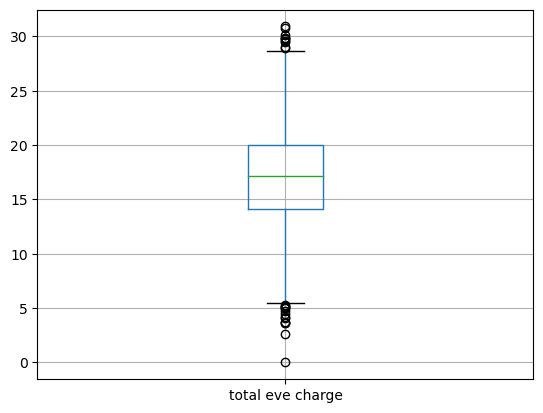

In [199]:
# checking for outliers in total eve charge
data.boxplot('total eve charge')
plt.show()

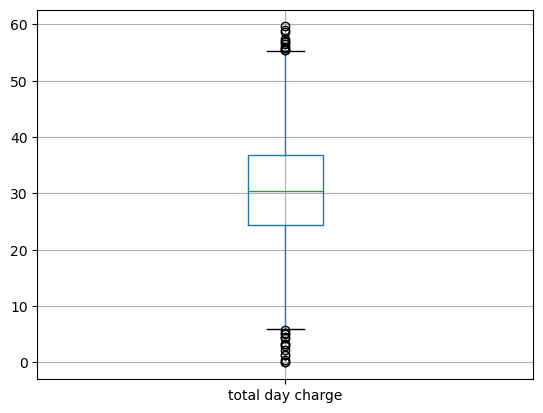

In [200]:
# checking for outliers in total day charge
data.boxplot('total day charge')
plt.show()

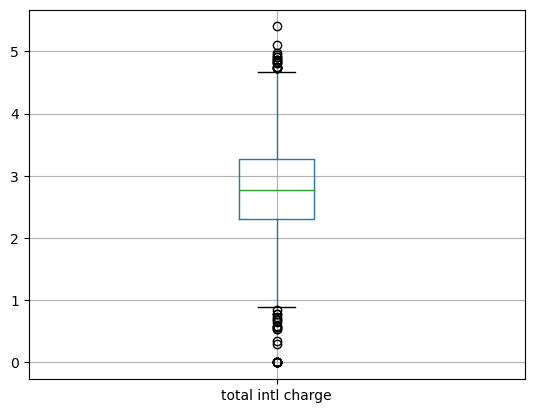

In [201]:
# checking for outliers in total intl charge
data.boxplot('total intl charge')
plt.show()

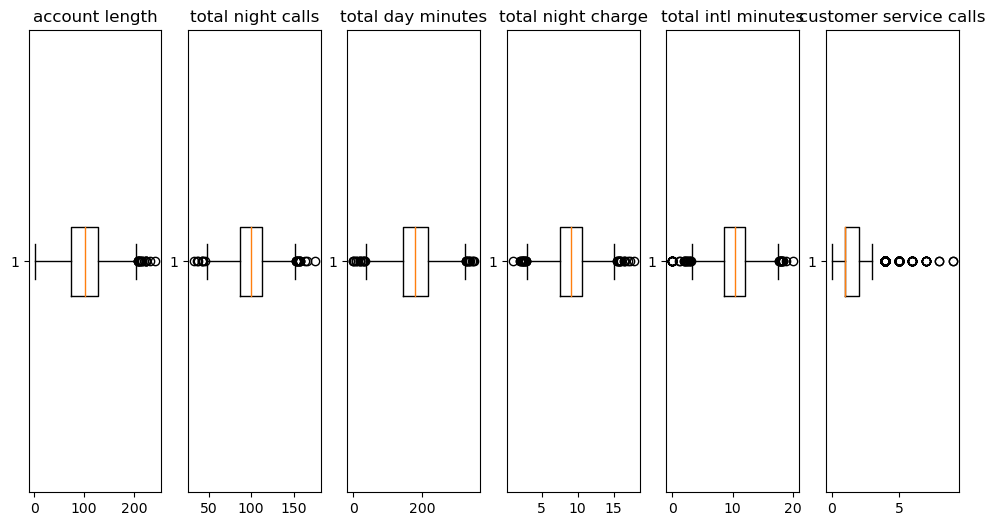

In [202]:
##  Identifying Outliers
num_cols = ["account length", "total night calls", "total day minutes", "total night charge","total intl minutes", "customer service calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(data[col], vert=False)
    axes[i].set_title(col)

plt.show()

`Observation`:
 we are not  going to drop the outliers cause customers have freedom  to use the SyriaTel service upto their maximum satisfaction of their needs hence the usage or the charges can't be the same to all cusomers since the needs differs and also for the case of customer service calls they were being served by different customer service representatives 

In [203]:
# dropping the phone number column because  it shouldn't be a reason why customer is choosing to churn.
dropped = data.drop('phone number',axis = 1, inplace =True)

## EDA Continuation

#### Categorical Variables

#### IDENTFYING THE CUSTOMERS WHO HAVE CHURNED

False    2850
True      483
Name: churn, dtype: int64


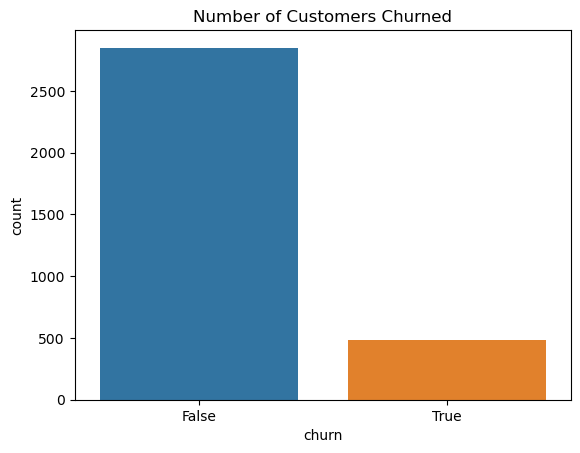

In [204]:
#ploting a countplot to  see the number of customers who churn
sns.countplot(data['churn'])
plt.title('Number of Customers Churned')
print(data['churn'].value_counts())


False    86.0
True     14.0
Name: churn, dtype: float64


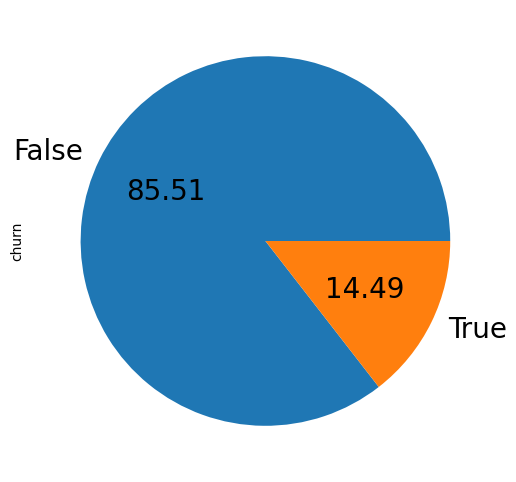

In [205]:
print(round(100*data['churn'].value_counts(normalize=True)))
data['churn'].value_counts().plot(kind='pie',labels = ["False", "True"],fontsize = 20 ,autopct = "%.2f",figsize=(6,6));

`Insight`:
From the pie chart above 14% of the customers churn while 86% customers not churn... This is a nice chance for SyriaTel to identify reasons why the customers are churning and carry out steps to stop or prevent more customers from churning before the rate increases rapidly

#### CUSTOMER'S  INTERNATIONAL PLAN  IN RELATION TO CHURNING

In [206]:
int_plan_churn = pd.DataFrame(data.groupby(['international plan'])['churn'].mean())
print(int_plan_churn);

                       churn
international plan          
no                  0.114950
yes                 0.424149


It appears 42% customers with an international plan with SyriaTel, end up churning. On a business stand point, this may be a worthwhile topic to further investigate. 

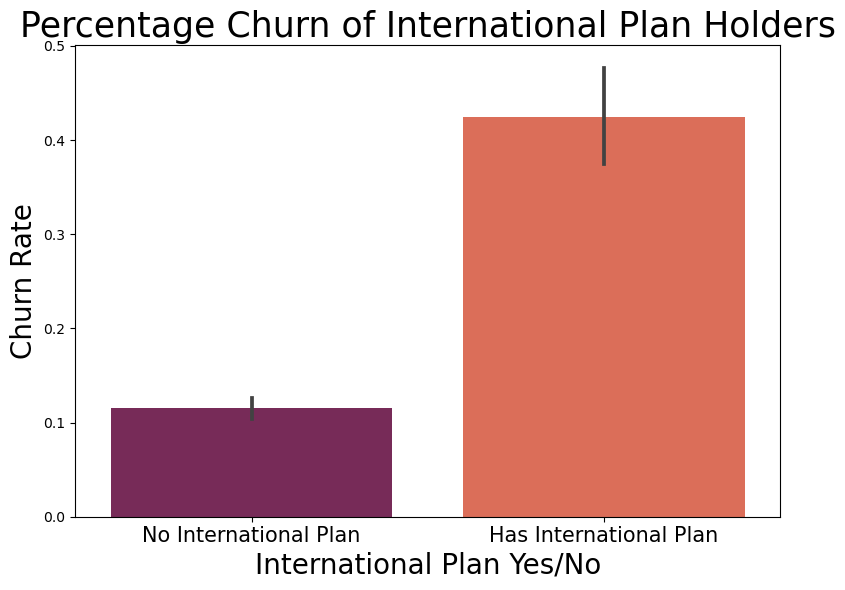

In [207]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="rocket", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout();

`Obervation`:
From the graph above majority of the customers holding international plan are churning because the services of SyriaTel are not fully satisfying them.
we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning resulting from it.

#### CUSTOMER SERVICE CALLS IN RELATION TO CHURNING

In [208]:
customer_service_call = pd.DataFrame(data.groupby(['customer service calls'])['churn'].mean())
customer_service_call

,churn
customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


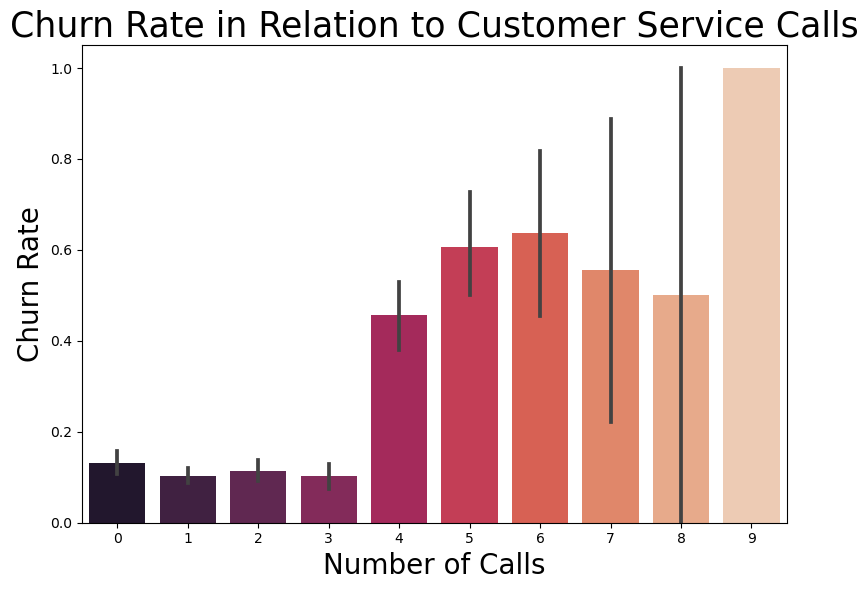

In [266]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['customer service calls'], y='churn',palette="rocket", ax = ax)
plt.title('Churn Rate in Relation to Customer Service Calls', fontsize=25)
plt.ylabel('Churn Rate', fontsize=20)
plt.xlabel('Number of Calls', fontsize=20)
plt.tight_layout();

Observation:From the graph ,We can see that  when a customer  calls to the customer  call service  four times, the likely hood of a customer to churn significantly increases. When a customer call a maximum of 9 customer calls, the churn rate reaches 100%. Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers needs when they are calling the to customer service way past 4 customer calls.

####  CUSTOMER'S AREA CODE IN RELATION TO CHURNING

area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


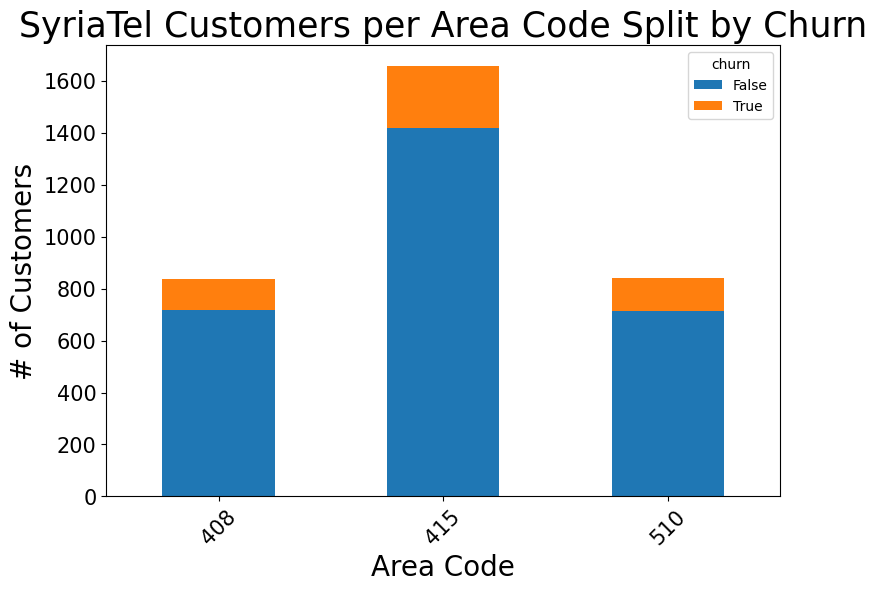

In [210]:
# percentage of churn by area code
print(data.groupby(["area code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (8, 6))
data.groupby(['area code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('SyriaTel Customers per Area Code Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel('# of Customers', fontsize = 20)
plt.tight_layout()

##rotate x-axis to a 45 degree angle 
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

After further investigation, it is clear that the 415 area code has more customers than the 408 or 510 area codes. However, all three area codes have a 14% <b>churn rate</b>.  Since area codes had no influence on the churn rate, I think it is safe to remove the column from our dataset.. 
- <b>churn rate</b> – is the rate at which customers or clients are leaving a company within a specific period of time.

In [211]:
# Drop the area code column from the dataset
data.drop('area code', axis=1, inplace=True)

#### CUSTOMERS ACCOUNT LENGTH IN RELATION TO CHURNING

In [212]:
customer_acc_length = pd.DataFrame(data.groupby(['account length'])['churn'].mean())
customer_acc_length.value_counts().head(20)



churn   
0.000000    48
0.333333    11
0.200000    11
0.125000    10
0.142857     9
0.111111     8
0.076923     6
0.500000     5
0.166667     5
0.250000     5
0.181818     4
0.071429     4
0.117647     3
0.100000     3
0.160000     3
0.157895     3
0.133333     3
0.222222     3
0.235294     3
1.000000     3
dtype: int64

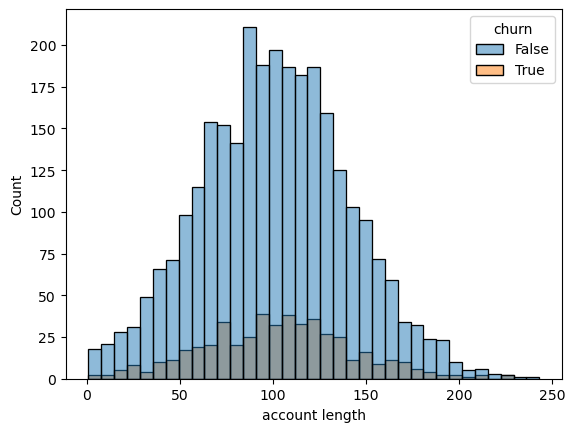

In [213]:
# Use histplot to plot account length against customer churn 

ax = sns.histplot(x="account length", hue="churn", data=data)

Observation:From the graph above majority of the customers who are churning have the lowest account length in SyriaTel.
The nature of this problem is framed by the fact that losing current customers is less expensive than gaining new customers,thus
taken under economic consideration, because if they were expensive then what was the point?Therefore we advice  SyriaTel to mantain  customers with high account lenth cause they are less likely to churn.

#### TOTAL DAY CHARGES TO CUSTOMERS IN RELATION TO CHURNING

In [214]:
tdc = data.groupby(data['churn'])\
          ['total day charge'].mean().sort_values(ascending=False).reset_index()
tdc.head()

,churn,total day charge
0,True,35.175921
1,False,29.780421


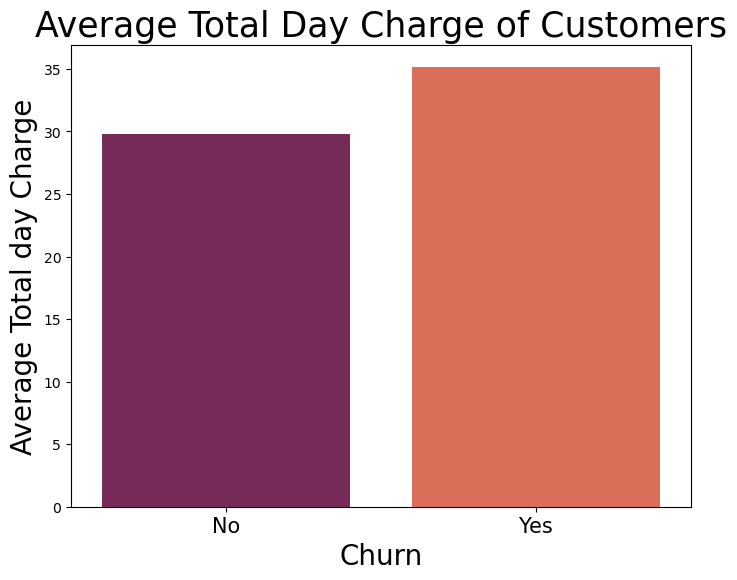

In [215]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y='total day charge', palette="rocket", ax = ax)
plt.title('Average Total Day Charge of Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Average Total day Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

`Insights`:
From the above graph the number of customer churning due to total day charge is high  with charge rate of 35.18 compared to customers not churning which is 29.78 charge rate Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers due to total day charges whether  the charges are unfavourable.

#### TOTAL INTERNATIONAL CHARGES TO CUSTOMERS IN RELATION TO CHURNING

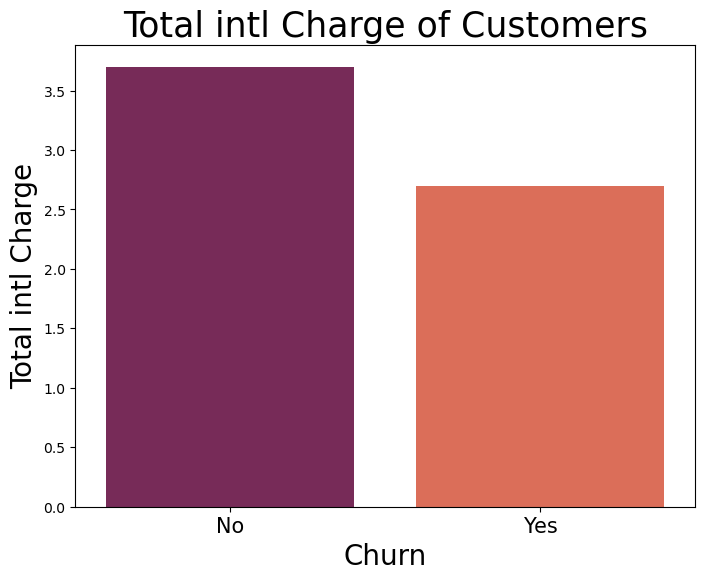

In [216]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y = data['total intl charge'], palette="rocket", ax = ax)
plt.title('Total intl Charge of Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total intl Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

`Insights`:
From the graph above number of customers not churning due to  international charge is larger than the number of customers churning hence its clear to SyriaTel that the international charge has no influence to the  customer churning.

#### TOTAL EVENING CHARGES TO CUSTOMERS IN RELATION TO CHURNING

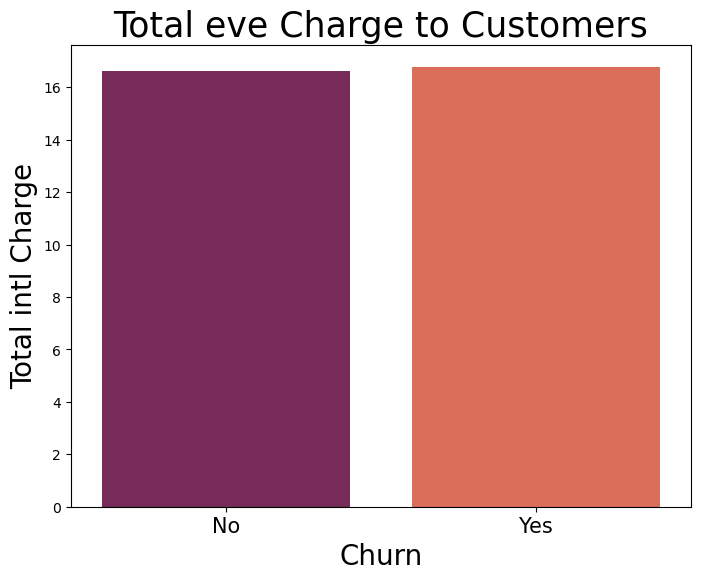

In [265]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y = data['total eve charge'], palette="rocket", ax = ax)
plt.title('Total eve Charge to Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total intl Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

`Point to note`:
From the above graph it seems like the rate of customer churning and not churning due to evening charges is almost same .Therefore further research should be conducted so as to come out with clear insights on whether evening charges on the calls the customers make has influence in customer churning

#### TOTAL NIGHT CHARGES TO CUSTOMERS IN RELATION TO CHURNING

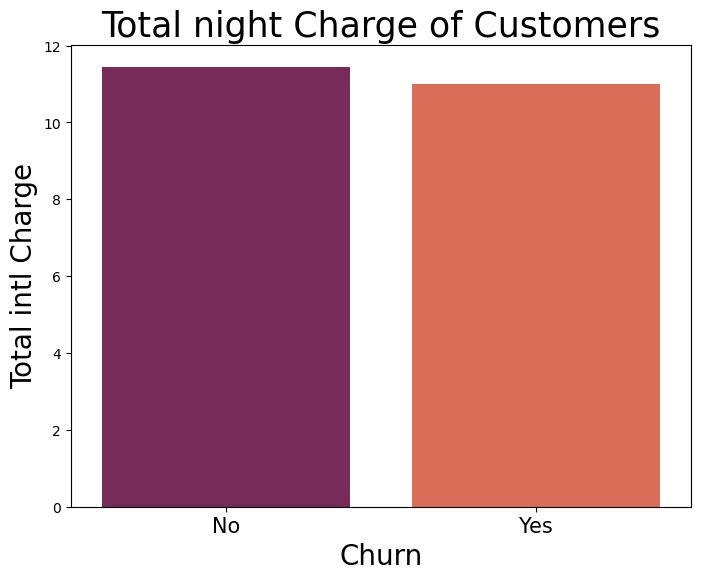

In [264]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=tdc, x='churn', y = data['total night charge'], palette="rocket", ax = ax)
plt.title('Total night Charge of Customers', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total intl Charge', fontsize=20)
ax.set_xticklabels(['No', 'Yes'], fontsize=15)
plt.tight_layout;

'Observation':
From the above graph the  rate of customers not churning due to night charge is higher than the rate of customers churning due  to night charges.Hence total night charge has no influence on the customer churning.

### Map columns: international plan, voice mail plan, and churn

In [219]:
data['international plan'] = data['international plan'].map({'no': 0, 'yes': 1})
data['voice mail plan'] = data['voice mail plan'].map({'no': 0, 'yes': 1})
data['churn'] = data['churn'].map({False: 0, True: 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

`insights`:
 international plan, voice mail plan, and churn columns are no longer categorial now instead the are integers

#### CORRELATION MATRIX

In [220]:
#plot correlation heatmap
data_correlation = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# convert all features that have a correlation to price of more than 0.3
data_correlation

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.00,0.02,0.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
international plan,0.02,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02,0.26
voice mail plan,0.00,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02,-0.10
number vmail messages,-0.00,0.01,0.96,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total day minutes,0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total day calls,0.04,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total day charge,0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total eve minutes,-0.01,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total eve calls,0.02,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01
total eve charge,-0.01,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09


You can see here that all *_minutes and *_charge features are perfectly correlated (r = 1). This is to be expected since charge is usually based on minutes. For this reason, we may not need to include both the charge and minutes columns, but rather choose just one. We might also choose to aggregate all the day/eve/night columns into one 'total' column. As mentioned earlier, for a first simple model, we will leave the features as is, but for later iterations we might choose to aggregate and drop these.

# Modelling

#### Create dummy variables for state column

Before modeling, there is one column that must be dealt with. The state column is categorical, and needs to be converted to dummy variables and added to the dataframe

In [221]:
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [222]:
#state
data = pd.get_dummies(data,columns =['state'], drop_first = True)

### Prepare Data for Modeling 

Create X, y variables

In [223]:
#Below I am creating the target variable y, and the independant variables X.
X = data.drop(['churn'], axis=1)
y = data['churn']

#### Train, Test, Split

In [224]:
# splitting the data into a training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =1)

In [225]:
# check for imbalance of the training data
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    2281
1     385
Name: churn, dtype: int64


0    569
1     98
Name: churn, dtype: int64


In [226]:
y_test.value_counts()

0    569
1     98
Name: churn, dtype: int64

In [227]:
sm = SMOTE()
#fit
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [228]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.153762,-0.330811,-0.466725,-0.520055,0.071127,-0.193096,0.071565,-0.373975,1.670077,-0.372965,...,-0.106328,-0.098685,-0.119283,-0.115444,-0.117379,-0.112484,-0.118335,-0.110468,-0.140247,-0.12116
1,0.390229,3.022876,-0.466725,-0.520055,0.415940,0.164725,0.416085,-0.004687,-1.128355,-0.004263,...,-0.106328,-0.098685,-0.119283,-0.115444,-0.117379,-0.112484,-0.118335,-0.110468,-0.140247,-0.12116
2,0.416503,-0.330811,-0.466725,-0.520055,-1.441762,0.931483,-1.441410,0.033240,-0.482563,0.033312,...,-0.106328,-0.098685,-0.119283,-0.115444,-0.117379,-0.112484,-0.118335,-0.110468,-0.140247,-0.12116
3,-0.555636,-0.330811,-0.466725,-0.520055,-0.479914,-0.090861,-0.479666,-0.124456,-1.020723,-0.124032,...,-0.106328,-0.098685,-0.119283,-0.115444,-0.117379,-0.112484,-0.118335,-0.110468,-0.140247,-0.12116
4,-0.240348,3.022876,2.142589,3.185544,1.499875,-0.653151,1.500109,-0.140425,0.163229,-0.140471,...,-0.106328,-0.098685,-0.119283,-0.115444,-0.117379,-0.112484,-0.118335,-0.110468,-0.140247,-0.12116


### Baseline Model

#### Logistic Regression 

In [229]:
#initialize logistic regression
logreg = LogisticRegression(random_state= 42)

# Fit the model
base_model = logreg.fit(X_train_scaled, y_train_resample)
base_model

LogisticRegression(random_state=42)

In [230]:
# get predictions
y_pred_base = logreg.predict(X_test_scaled)
print(y_pred_base)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [231]:
# Scoring 
base_score = logreg.score(X_test_scaled, y_test)
base_score

0.8320839580209896

In [232]:
# Cross Validation
base_cv = cross_val_score(logreg, X_train_scaled, y_train_resample)
base_cv

array([0.59036145, 0.95837897, 0.94627193, 0.95723684, 0.96600877])

In [233]:
# classification report

print(confusion_matrix(y_test, y_pred_base))

print(classification_report(y_test, y_pred_base))

[[535  34]
 [ 78  20]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       569
           1       0.37      0.20      0.26        98

    accuracy                           0.83       667
   macro avg       0.62      0.57      0.58       667
weighted avg       0.80      0.83      0.81       667



In [234]:
print("Training Accuracy for Logistic Regression: {:.3}%".format(accuracy_score (y_test, y_pred_base) * 100))

Training Accuracy for Logistic Regression: 83.2%


After running the classification report on our baseline model  the probability of customers not churning is 94% while the probability of the customers churning is 20%

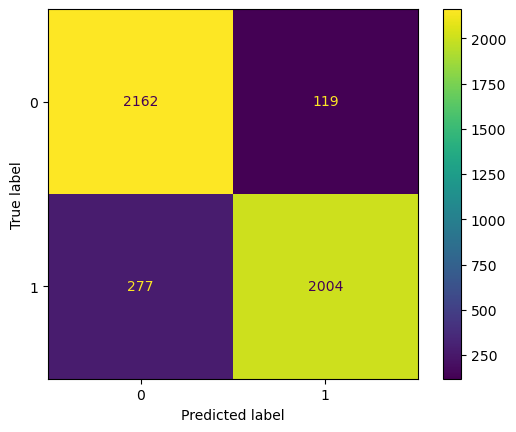

In [235]:
# Displaying a confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_train_scaled, y_train_resample);

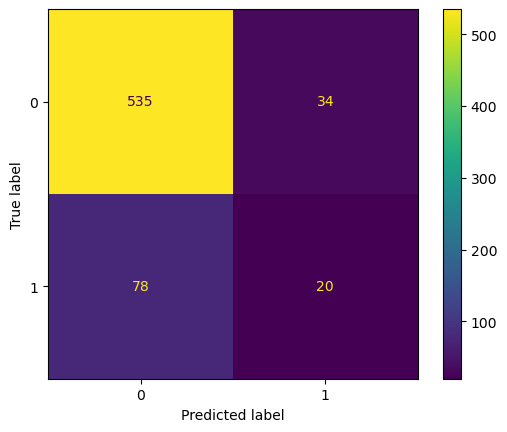

In [236]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base)

In [237]:
#### plot actual against prediction


###  Model 1

#### `KNeighborsClassifier`

In [280]:
#  Initialize the Knn model
knn = KNeighborsClassifier(n_neighbors = 3)

#fit the model
knn_model = knn.fit(X_train_scaled,y_train_resample) 


In [281]:
# making y prediction
y_knn_pred = knn.predict(X_test_scaled)

knn_y_pred_prob = knn.predict_proba(X_test_scaled)

knn_y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [282]:
# Scoring
knn_score = knn.score(X_train_scaled, y_train_resample)
knn_score

0.9351161771153003

In [283]:
# Cross Validation
knn_cv = cross_val_score(knn, X_train, y_train)
knn_cv

array([0.87078652, 0.85178236, 0.85928705, 0.8630394 , 0.87242026])

In [284]:
# classification report

print(confusion_matrix(y_test, y_knn_pred))

print(classification_report(y_test, y_knn_pred))

[[548  21]
 [ 84  14]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       569
           1       0.40      0.14      0.21        98

    accuracy                           0.84       667
   macro avg       0.63      0.55      0.56       667
weighted avg       0.80      0.84      0.81       667



In [285]:
print("The Accuracy of KNeighborsClassifier : {:.3}%".format(accuracy_score(y_test, y_knn_pred) * 100))

The Accuracy of KNeighborsClassifier : 84.3%


After running the classification report on our KNeighborsClassifier the probability of customers not churning is 91% while the probability of the customers  churning is 27%

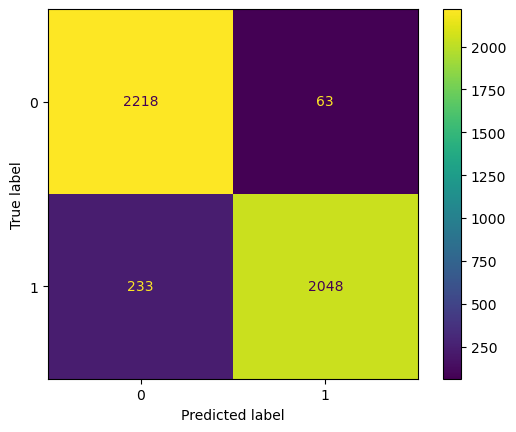

In [286]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_train_scaled, y_train_resample);

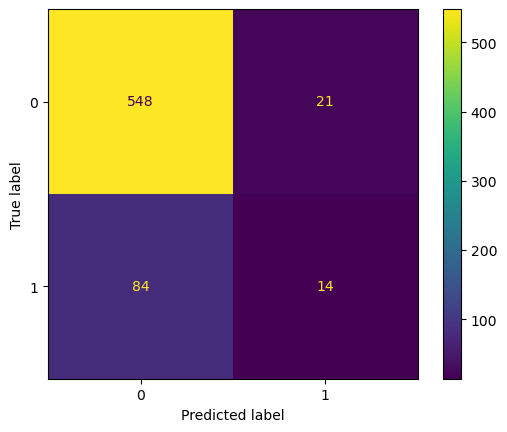

In [287]:
#  Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_knn_pred);

#### k-NN with Hyperparameter Tuning

In [288]:
grid_params = { 'n_neighbors' : [1,2,3,4,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [289]:
# fit the model on our train set
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train_scaled, y_train_resample)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [290]:
# find the best score
g_res.best_score_

0.9401658938602259

In [291]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [301]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',metric = 'manhattan')
knn.fit(X_train_scaled, y_train_resample)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [302]:
# Scoring
knn_score = knn.score(X_train_scaled, y_train_resample)
knn_score

1.0

In [303]:
# classification report

print(confusion_matrix(y_test, y_knn_pred))

print(classification_report(y_test, y_knn_pred))

[[548  21]
 [ 84  14]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       569
           1       0.40      0.14      0.21        98

    accuracy                           0.84       667
   macro avg       0.63      0.55      0.56       667
weighted avg       0.80      0.84      0.81       667



In [295]:
#plt actual against predicted

### MODEL 2

#### Decision Tree Classifier

In [296]:
# Initialize Decision Tree
tree_classfier = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 2, min_samples_split = 5,random_state=42)

#fit the model
tree_model = tree_classfier.fit(X_train_scaled, y_train_resample)
tree_model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [297]:
#predicting

y_tree_pred = tree_classfier.predict(X_test_scaled)
print(y_tree_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 

In [298]:
# Scoring on training data
tree_train_score = tree_classfier.score(X_train_scaled, y_train_resample)
print('Trained data score: ', tree_train_score)


Trained data score:  0.8551074090311267


In [299]:
# Scoring on test data
tree_test_score = tree_classfier.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Test data score:  0.9085457271364318


In [ ]:
#print confusion matrix 
print(confusion_matrix(y_test, y_tree_pred))

#print classification report
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

[[539  30]
 [ 31  67]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       569
           1       0.69      0.68      0.69        98

    accuracy                           0.91       667
   macro avg       0.82      0.82      0.82       667
weighted avg       0.91      0.91      0.91       667



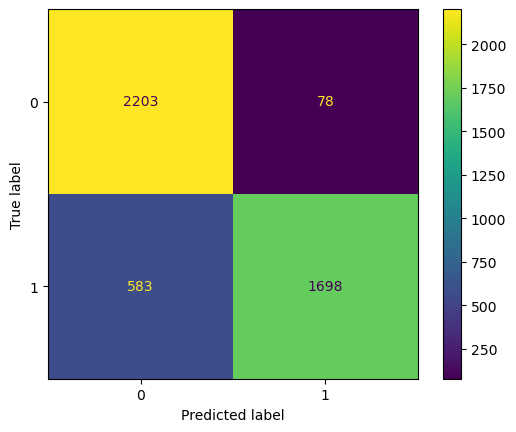

In [ ]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree_classfier, X_train_scaled, y_train_resample);

We have a much better recall score on our training data using the decision tree model. We improved from our baseline model from 22% previously, to 79% with the decision tree model. 

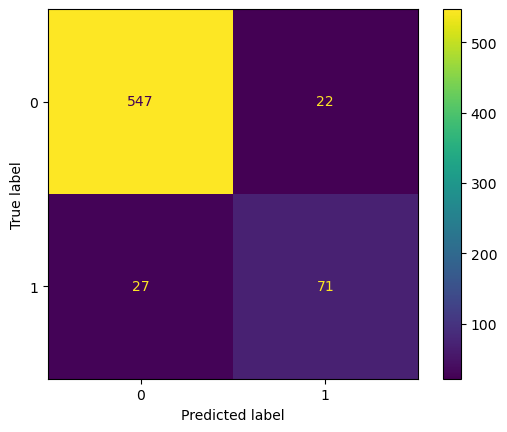

In [ ]:
# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_pred);

#### DECISION TREE WITH HYPERPARAMETER TUNING

In [ ]:

# Create the pipeline
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=123))])

# Create the grid parameter
grid = [{'tree__max_depth': [None, 2, 6, 10], 
         'tree__min_samples_split': [5, 10]}]


# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit using grid search
gridsearch.fit(X_train_resample, y_train_resample)

# Calculate the test score
gridsearch.score(X_test, y_test)

0.9025487256371814

In [ ]:
#print confusion matrix 
print(confusion_matrix(y_test, y_tree_pred))

#print classification report
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

[[539  30]
 [ 31  67]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       569
           1       0.69      0.68      0.69        98

    accuracy                           0.91       667
   macro avg       0.82      0.82      0.82       667
weighted avg       0.91      0.91      0.91       667



### Model 3: Random Frorest Classifier

In [304]:
#Instantiate  a RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5, random_state=42)

# fit the classifier
rf_model_train = rf.fit(X_train_scaled, y_train_resample)
rf_model_test = rf.fit(X_test, y_test) 

In [305]:
# get predictions for test
y_rf_pred = rf.predict(X_test_scaled) 

In [306]:
# Scoring
rf_score = rf.score(X_train_scaled, y_train_resample)
rf_score

0.4857518632178869

In [307]:
# Cross validation
rf_cv = cross_val_score(rf, X_train_scaled, y_train_resample)
rf_cv

array([0.86199343, 0.8871851 , 0.91447368, 0.88925439, 0.89254386])

In [308]:
# Printing confusion matrix for test
print(confusion_matrix(y_test, y_rf_pred))

# classificatio report
rf_report = classification_report(y_test, y_rf_pred)
print(rf_report)

[[ 68 501]
 [ 27  71]]
              precision    recall  f1-score   support

           0       0.72      0.12      0.20       569
           1       0.12      0.72      0.21        98

    accuracy                           0.21       667
   macro avg       0.42      0.42      0.21       667
weighted avg       0.63      0.21      0.21       667



In [309]:
print("Test Accuracy for Random Forest: {:.4}%".format(accuracy_score(y_test, y_rf_pred) * 100))

Test Accuracy for Random Forest: 20.84%


On our random forest model did not perform as well as the decision tree producing a recall score of 20%

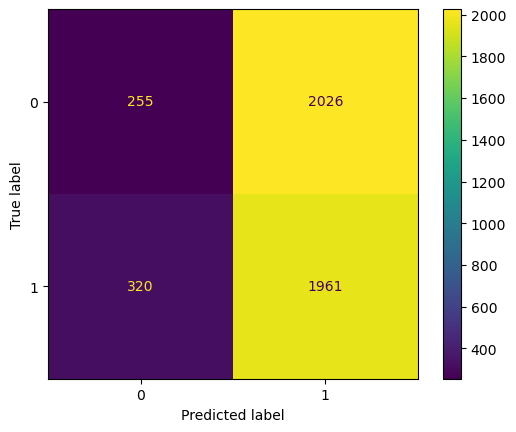

In [310]:
#  Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_train_scaled, y_train_resample);

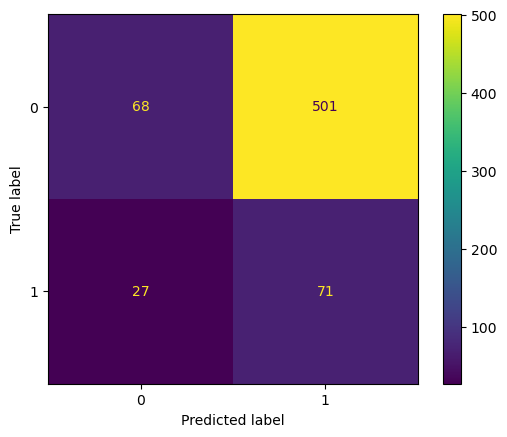

In [311]:
# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_rf_pred);

In [312]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

# Create the grid parameter

grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]


# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator= scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit using grid search
gridsearch.fit(X_train, y_train)

# Calculate the test score
gridsearch.score(X_test, y_test)

0.8905547226386806

# Recommendation

I recommend  SyriaTel to determine if international plans are meeting the customers needs since it seems it has highest rate of customer churning.
Implement new plan features  in the international plans or conduct a research engaging the international plan holders for both churn and not churn to identify where the SyriaTel ain't meeting the customers needs

Manager of the customer service department  must strategize to  conduct efficient training to the customer calls attentant so as to equip them with skills to enable them in handling customer service calls with the goal of reducing the number of calls a customer calls in regards to their services. 

I recommend SyriaTel to explore ways to retain customers by creatig new incentives to customers who have an average total day charge of $35 .

# Conclusion